**SCRAPPING**

Dans cette première étape, nous allons effectuer du scrapping sur le site hellowork

Celui-ci référence les emplois, le salaires, les zones sur une seule et même page.

Il n'est pas nécéssaire de changer de page pour afficher plus d'offres, la pagination se fait automatiquement. Le maximum de page est géré par la variable maximum_pages.

**Ce code a donc pour but de :**
- Se rendre sur le site hellowork.com, section Data scientist en France
- Collecter les données et les ranger dans un tableau via pandas (Nom des posts, nom de l'entreprise, type de post, zones, salaires, mois en cours, années en cours)
- Passer à la page suivante dès que le scrapping est fait
- Organiser les emplois par type (colonne Number) selon les mots clés : 
    - 1 Data analyst 
    - 2 Data scientist
    - 3 Data engineer
    - 4 Big data
    - 5 Business Intelligence
    - 6 Chef(fe) de projet
    - 7 Developpeur
    - 0 Autres post dans la data
- Créer un fichier Excel avec les données collectées afin de les stocker
- Etablire un model de régression linéaire afin d'évaluer l'évolution des salaire par type ainsi que l'évolution du nombre de post à pourvoir puis afficher graphiquement

Vous pouvez run all directement

--------------------------------------

**Nous commençons par importer les packages**

In [54]:
%pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
%pip install selenium

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: selenium in c:\users\yamer\appdata\local\programs\python\python312\lib\site-packages (4.16.0)




[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
%pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
%pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Nous scrappons le site internet**

Pour rappel, maximum_pages défini le nombre de pages ciblées.

------------------------------------------

**SCRAPPING**

Nous scrappons le site afin de créer un fichier excel qui permettra de sauvegarder les données

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
import re
from datetime import datetime

def extract_salary(salary_str):
    numbers = re.findall(r'\d+', salary_str)
    return ''.join(numbers) if numbers else None

def process_salary(salary_str):
    if salary_str and '-' in salary_str:
        salary_min, salary_max = salary_str.split('-')
        return int(extract_salary(salary_min)), int(extract_salary(salary_max))
    else:
        return None, None

def classify_job_title(job_title):
    job_title_lower = job_title.lower()
    if "analyste" in job_title_lower or "analyst" in job_title_lower:
        return 1
    elif "scientist" in job_title_lower:
        return 2
    elif "engineer" in job_title_lower or "ingénieur" in job_title_lower or "ingenieur" in job_title_lower:
        return 3
    elif "big" in job_title_lower:
        return 4
    elif "bi" in job_title_lower:
        return 5
    elif "projet" in job_title_lower:
        return 6
    elif "developpeur" in job_title_lower or "developer" in job_title_lower:
        return 7
    else:
        return 0

options = webdriver.ChromeOptions()
options.add_argument("--disable-notifications")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

current_page = 1
maximum_pages = 103
data = []

current_day = datetime.now().day
current_month = datetime.now().month
current_year = datetime.now().year

while current_page <= maximum_pages:
    url = f'https://www.hellowork.com/fr-fr/emploi/recherche.html?k=data+&ray=all&msa=0&cod=all&d=all&p={current_page}&mode=pagination'
    driver.get(url)
    time.sleep(3)

    job_listings = driver.find_elements(By.CSS_SELECTOR, 'li[class="!tw-mb-6 "]')
    
    for job in job_listings:
        job_title_elements = job.find_elements(By.CSS_SELECTOR, 'a[class="md:tw-text-xlOld tw-text-2xlOld tw-leading-[1.625rem]"]')
        contract_elements = job.find_elements(By.CSS_SELECTOR, 'span[data-cy="contract"]')
        company_elements = job.find_elements(By.CSS_SELECTOR, 'span.tw-mr-2')
        location_elements = job.find_elements(By.CSS_SELECTOR, 'span.tw-text-ellipsis')
        salary_elements = job.find_elements(By.CSS_SELECTOR, 'span.tw-text-jobsCandidacy.tw-typo-s')

        job_title = job_title_elements[0].text if job_title_elements else 'N/A'
        number = classify_job_title(job_title)
        contract = contract_elements[0].text if contract_elements else 'N/A'
        company = company_elements[0].text if company_elements else 'N/A'

        # Traitement de la localisation et extraction de la région
        location_raw = location_elements[0].text if location_elements else 'N/A'
        location_parts = re.split(r'(\d+)', location_raw)
        location_clean = location_parts[0].strip()
        region = location_parts[1].strip() if len(location_parts) > 1 else 'N/A'

        salary = salary_elements[0].text if salary_elements else None
        salary_min, salary_max = process_salary(salary)
        
        data.append([number, job_title, contract, company, location_clean, region, salary_min, salary_max, current_day, current_month, current_year])

    current_page += 1

driver.quit()

df = pd.DataFrame(data, columns=["Number", "Job Title", "Contrat", "Company", "Location", "Region", "Salary min", "Salary max", "Day", "Month", "Year"])

df['Salary min'] = pd.to_numeric(df['Salary min'], errors='coerce')
df['Salary max'] = pd.to_numeric(df['Salary max'], errors='coerce')
df['Salary'] = df[['Salary min', 'Salary max']].mean(axis=1, skipna=True)
df = df.dropna(subset=['Salary'])
df_scrapped = df[(df['Salary'] >= 15000) & (df['Salary'] <= 100000)]


df_scrapped.to_excel('JobsListML.xlsx', index=False)    




**Nous analysons les données collectées**

In [62]:
df_scrapped

,Number,Job Title,Contrat,Company,Location,Region,Salary min,Salary max,Day,Month,Year,Salary
0,0,Data Technique H/F,CDI,Utigroup,Dijon -,21,40000.0,46000.0,25,1,2024,43000.0
1,0,Data Administrator H/F,CDI,Adsearch,Aulnay-sous-Bois -,93,30000.0,50000.0,25,1,2024,40000.0
2,0,Data Architecte H/F,CDI,Adsearch,Mougins -,06,50000.0,60000.0,25,1,2024,55000.0
3,0,Tech Lead Data H/F,CDI,Omniciel,Toulon -,83,60000.0,70000.0,25,1,2024,65000.0
4,0,Tech Lead Data H/F,CDI,Omniciel,Aix-en-Provence -,13,60000.0,70000.0,25,1,2024,65000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
500,1,Alternance - Marketing Data Analyst Après-Vent...,Alternance,Nissan,Montigny-le-Bretonneux -,78,47174.0,174720.0,25,1,2024,110947.0
501,0,Responsable Data Patrimoine H/F,CDI,HLM,Saint-Nazaire -,44,30000.0,35000.0,25,1,2024,32500.0
502,1,Alternance Data Analyste H/F,Alternance,Eurocom Business Services,Clichy -,92,47174.0,174720.0,25,1,2024,110947.0
503,1,Gdo - Alternance - Business Intelligence Data ...,Alternance,Air Liquide,Paris -,75,47174.0,174720.0,25,1,2024,110947.0


In [2]:
df_scrapped.describe()

,Number,Salary min,Salary max,Day,Month,Year,Salary
count,389.000000,389.000000,389.000000,389.0,389.0,389.0,389.000000
mean,1.835476,43091.742931,53308.424165,25.0,1.0,2024.0,48200.083548
std,1.885560,10751.710622,13172.214633,0.0,0.0,0.0,11661.243201
min,0.000000,18000.000000,21203.000000,25.0,1.0,2024.0,19601.500000
25%,0.000000,35000.000000,45000.000000,25.0,1.0,2024.0,40000.000000
50%,1.000000,40000.000000,52000.000000,25.0,1.0,2024.0,47500.000000
75%,3.000000,50000.000000,60000.000000,25.0,1.0,2024.0,55000.000000
max,7.000000,81000.000000,100000.000000,25.0,1.0,2024.0,90000.000000


In [3]:
# Nous calculons la moyenne des salaires par type.
# Le post de data engineer semble être le plus rémunéré en moyenne

average_salaries = df_scrapped.groupby('Number')['Salary'].mean()
average_salaries

Number
0    49104.166667
1    44476.562500
2    46431.818182
3    48308.235294
4    47114.392857
5    51886.066667
6    51962.962963
7    42500.000000
Name: Salary, dtype: float64

In [4]:
# Nous calculons le nombre de post à pourvoir par type
# Sous constatons que les post de data engineer et data analyst sont les plus demandés

count_salaries = df_scrapped.groupby('Number')['Salary'].count()
count_salaries

Number
0    144
1     64
2     22
3    102
4     14
5     15
6     27
7      1
Name: Salary, dtype: int64

Nous importons les précédentes données scrappées et stockée dans le même fichier que celui de notre scrapping

In [23]:
catExcel = pd.read_excel('./JobsList.xlsx')
catExcel.describe()

Number
0    47852.956835
1    43793.279661
2    44972.222222
3    47785.833333
4    49375.000000
5    48913.642857
6    52300.000000
7    42500.000000
Name: Salary, dtype: float64

In [ ]:
average_salaries_m1 = catExcel.groupby('Number')['Salary'].mean()
average_salaries_m1

In [24]:
count_salaries_m1 = catExcel.groupby('Number')['Salary'].count()
count_salaries_m1

Number
0    139
1     59
2     18
3     96
4     16
5     14
6     30
7      1
Name: Salary, dtype: int64

-------------------

**Projection**

Nous souhaitons faire une projection des salaires futurs et évaluer le nombre d'annonce en ligne par catégorie. Cependant, n'ayant que les données du 15/01, en attendant les prochaines et afin de tester la régression, nous établissons des données aléatoires sur la bases de celles scrappées. En mutlipliant par 0.5 à 1.5.

In [5]:
import random

# Nous générons des nombres aléatoires entre 0.9 et 1.1

random_number0 = random.uniform(0.9, 1.1)
random_number1 = random.uniform(0.9, 1.1)
random_number2 = random.uniform(0.9, 1.1)
random_number3 = random.uniform(0.9, 1.1)
random_number4 = random.uniform(0.9, 1.1)
random_number5 = random.uniform(0.9, 1.1)
random_number6 = random.uniform(0.9, 1.1)
random_number7 = random.uniform(0.9, 1.1)


**Regression linéaire**

Nous allons maintenant effectuer la regression et afficher graphiquement les resultats

Régression pour Mean_Salary_0:
  rmse : 167438.36220927894
  r2 : 0.8847484423255815
  Coefficient (pente): -5.735740580502972
  Intercept: 4284584.08162077



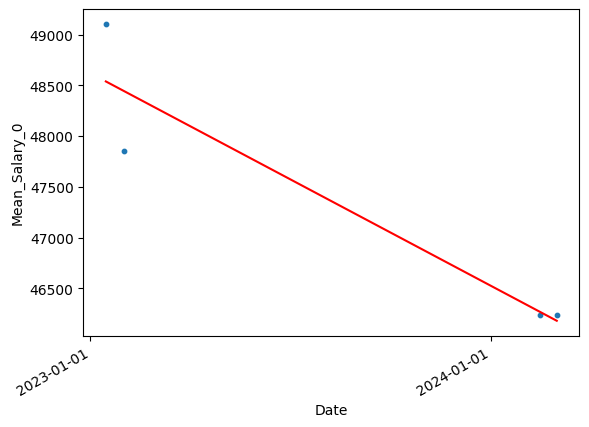

Régression pour Mean_Salary_1:
  rmse : 44325.747318078626
  r2 : 0.9640604157262332
  Coefficient (pente): -5.516570207079764
  Intercept: 4118367.5469592363



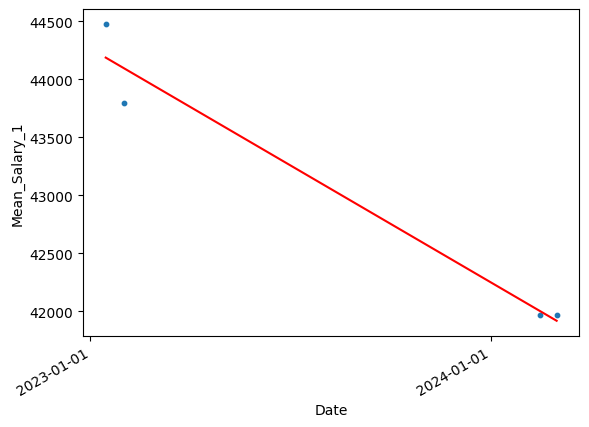

Régression pour Mean_Salary_2:
  rmse : 274550.69150993647
  r2 : 0.18692545015257223
  Coefficient (pente): 1.2710300556866845
  Intercept: -892992.8477295366



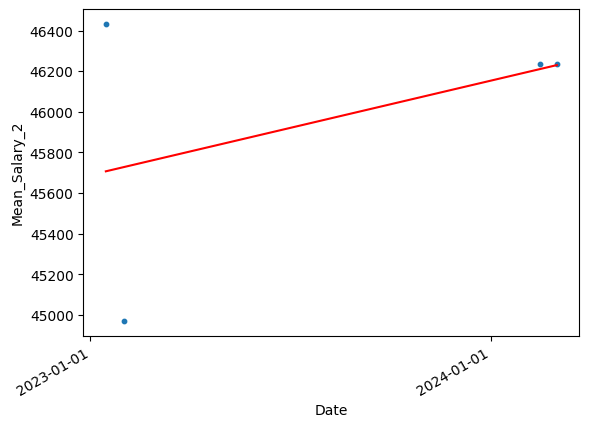

Régression pour Mean_Salary_3:
  rmse : 15959.751760815845
  r2 : 0.9976901897938445
  Coefficient (pente): -13.28306458852622
  Intercept: 9858169.345831037



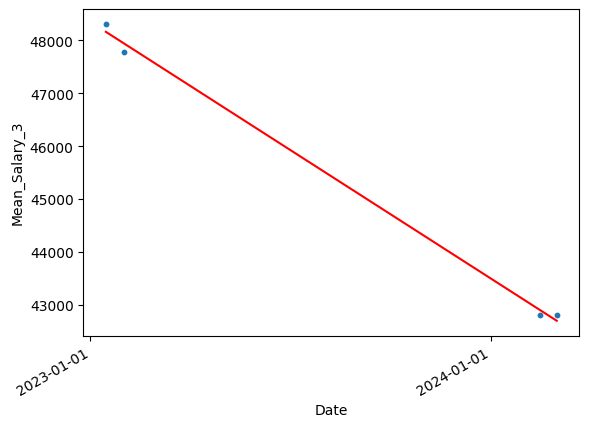

Régression pour Mean_Salary_4:
  rmse : 766347.090871333
  r2 : 0.8835292367277938
  Coefficient (pente): -12.198046198519144
  Intercept: 9057004.137831192



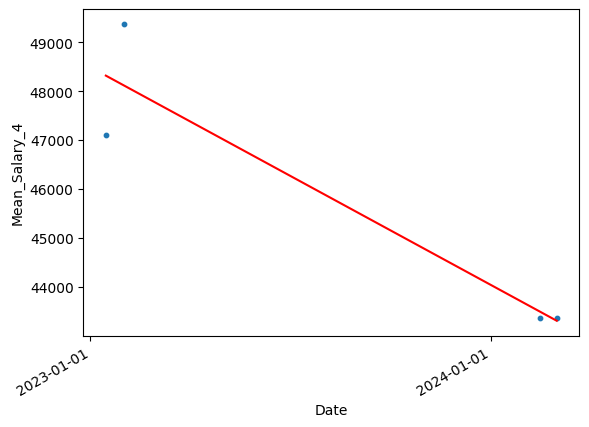

Régression pour Mean_Salary_5:
  rmse : 1289444.1759171016
  r2 : 0.848605443746242
  Coefficient (pente): 13.601116636613373
  Intercept: -9994580.02350854



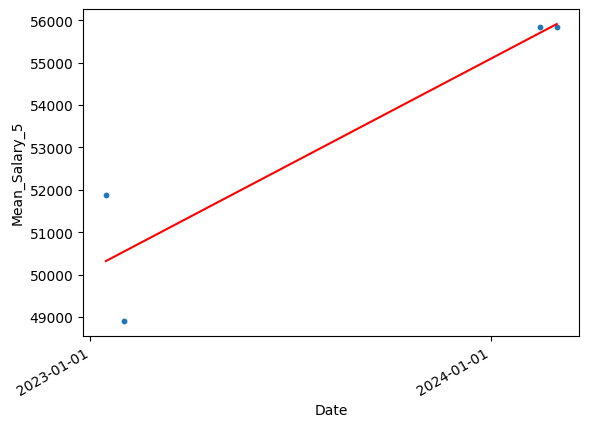

Régression pour Mean_Salary_6:
  rmse : 10099.323222885814
  r2 : 0.9778589706024113
  Coefficient (pente): 3.3787873470479592
  Intercept: -2443252.4787357757



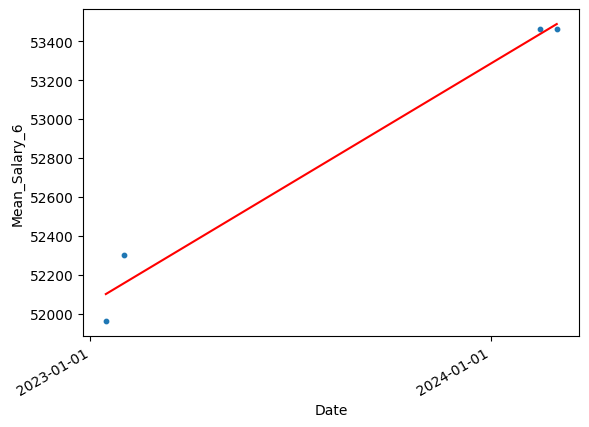

Régression pour Mean_Salary_7:
  rmse : 920.0357526853655
  r2 : 0.9983555367860513
  Coefficient (pente): 3.7810150114935697
  Intercept: -2749942.830114599



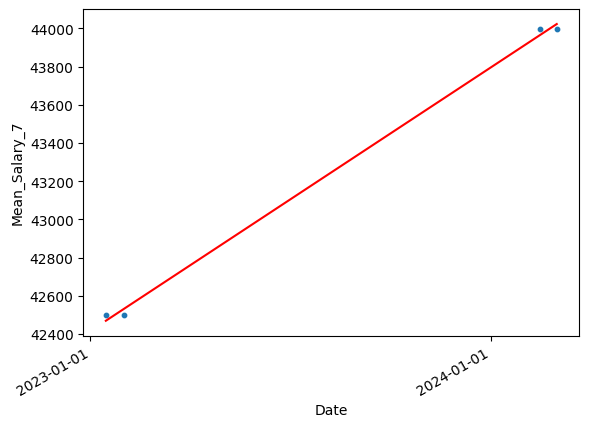

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates



# Nous établissons la bibliothèque data comprenant chaque type d'emploi, les données du 15/01 sont celles scrappées, les suivantes sont établies aléatoirement pour tester la régression
data_average = {
    'Date': ['01/15/2023', '02/01/2023', '02/15/2024', '03/01/2024',],
    'Mean_Salary_0': [average_salaries[0], average_salaries_m1[0], average_salaries[0]*random_number0, average_salaries[0]*random_number0],  # Pour Number 1
    'Mean_Salary_1': [average_salaries[1], average_salaries_m1[1], average_salaries[1]*random_number1, average_salaries[1]*random_number1],  # Pour Number 2
    'Mean_Salary_2': [average_salaries[2], average_salaries_m1[2], average_salaries[2]*random_number2, average_salaries[2]*random_number2],  # Pour Number 2
    'Mean_Salary_3': [average_salaries[3], average_salaries_m1[3], average_salaries[2]*random_number3, average_salaries[2]*random_number3],  # Pour Number 2
    'Mean_Salary_4': [average_salaries[4], average_salaries_m1[4], average_salaries[4]*random_number4, average_salaries[4]*random_number4],  # Pour Number 2
    'Mean_Salary_5': [average_salaries[5], average_salaries_m1[5], average_salaries[5]*random_number5, average_salaries[5]*random_number5],  # Pour Number 2
    'Mean_Salary_6': [average_salaries[6], average_salaries_m1[6], average_salaries[6]*random_number6, average_salaries[6]*random_number6],  # Pour Number 2
    'Mean_Salary_7': [average_salaries[7], average_salaries_m1[7], average_salaries[7]*random_number7, average_salaries[7]*random_number7],  # Pour Number 2
    
}

# Création du data frame
df_average = pd.DataFrame(data_average)

# Transformation des dates en nombres et non en string
df_average['Date'] = pd.to_datetime(df_average['Date'])
df_average['Date_ordinal'] = df_average['Date'].apply(lambda x: x.toordinal())

# Nous faisons la regression linéaire pour chaque groupe de Number en excluant la colonne 'Date' et 'Date_ordinal'
for col in df_average.columns[1:-1]:  
    X_average = df_average[['Date_ordinal']]
    y_average = df_average[col]
    model_average = LinearRegression()
    model_average.fit(X_average, y_average)
    y_predicted = model_average.predict(X_average)

    # Évaluation du modèle
    rmse = mean_squared_error(y_average, y_predicted)
    r2 = r2_score(y_average, y_predicted)
   
    
    #  Nous affichons les résultats de la régression pour chaque groupe
    print(f"Régression pour {col}:")
    print(f"  rmse : {rmse}")
    print(f"  r2 : {r2}")
    print(f"  Coefficient (pente): {model_average.coef_[0]}")
    print(f"  Intercept: {model_average.intercept_}\n")

    # Points de données
    plt.scatter(df_average['Date'], y_average, s=10)
    plt.xlabel('Date')
    plt.ylabel(col)

    # Formatage de l'axe des x pour afficher les dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    # Rotation des étiquettes de date pour une meilleure lisibilité
    plt.gcf().autofmt_xdate()

    # Valeurs prédites
    plt.plot(df_average['Date'], y_predicted, color='r')
    plt.show()



Nous faisons de même pour les valeurs count (nombre d'annonce en ligne par type)

Régression pour Mean_Count_0:
  rmse : 8.461471727379903
  r2 : 0.36204638623342655
  Coefficient (pente): -0.01108628468864905
  Intercept: 8327.585075731737



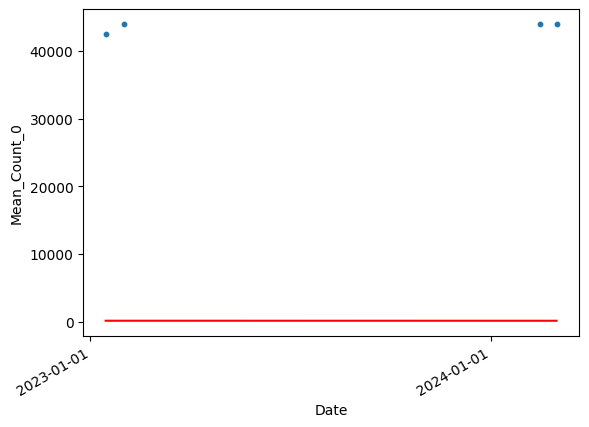

Régression pour Mean_Count_1:
  rmse : 1.5598661655915689
  r2 : 0.3620463862334721
  Coefficient (pente): -0.004759997690538543
  Intercept: 3577.69707298718



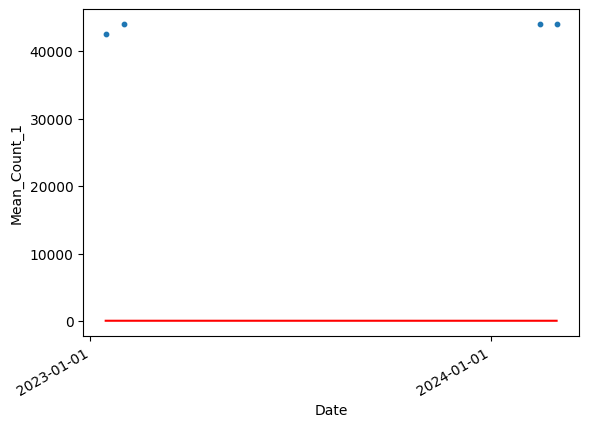

Régression pour Mean_Count_2:
  rmse : 0.21391152550436313
  r2 : 0.24137047537760858
  Coefficient (pente): 0.0013198355148736198
  Intercept: -953.3841633031273



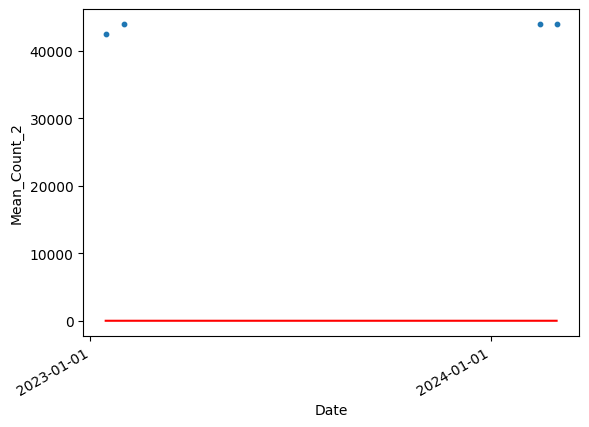

Régression pour Mean_Count_3:
  rmse : 798.8061601982615
  r2 : 0.3620463862334845
  Coefficient (pente): -0.10771688248135348
  Intercept: 79615.58788226939



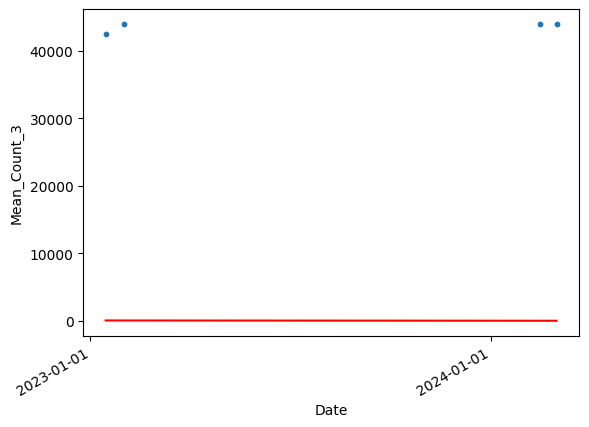

Régression pour Mean_Count_4:
  rmse : 0.14809096568817762
  r2 : 0.3620463862335074
  Coefficient (pente): -0.0014666529345650978
  Intercept: 1096.6421478129732



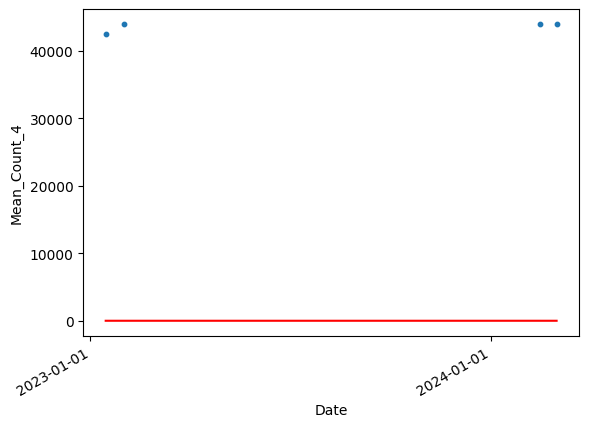

Régression pour Mean_Count_5:
  rmse : 0.1566937314149621
  r2 : 0.36204638623350205
  Coefficient (pente): 0.0015086513451712422
  Intercept: -1098.6441990766218



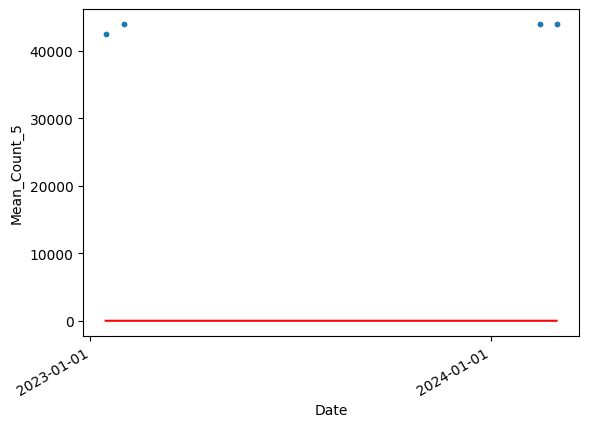

Régression pour Mean_Count_6:
  rmse : 0.07247748273485766
  r2 : 0.3620463862333929
  Coefficient (pente): 0.0010260407832863945
  Intercept: -730.3945895320356



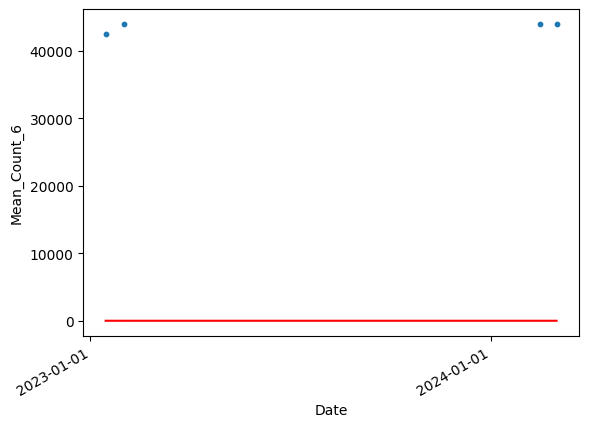

Régression pour Mean_Count_7:
  rmse : 0.00014820165265827742
  r2 : 0.36204638623341456
  Coefficient (pente): 4.6396967527486223e-05
  Intercept: -33.248942876769554



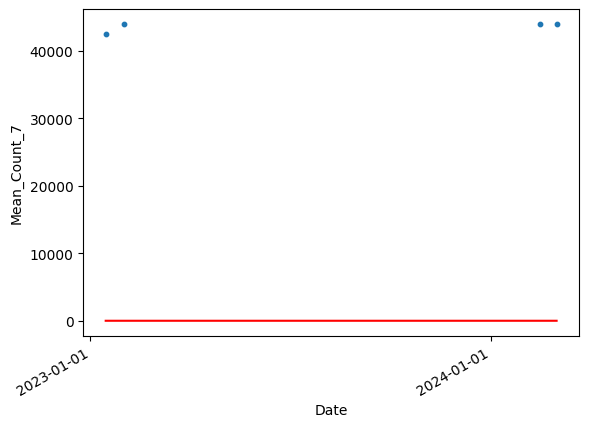

In [10]:
# Nous établissons la bibliothèque data comprenant chaque type d'emploi, les données du 15/01 sont celles scrappées, les suivantes sont établies aléatoirement pour tester la régression
data_count = {
    'Date': ['01/15/2023', '02/01/2023', '02/15/2024', '03/01/2024',],
    'Mean_Count_0': [count_salaries[0], count_salaries[0]*random_number0, count_salaries[0]*random_number0, count_salaries[0]*random_number0],  # Pour Number 1
    'Mean_Count_1': [count_salaries[1], count_salaries[1]*random_number1, count_salaries[1]*random_number1, count_salaries[1]*random_number1],  # Pour Number 2
    'Mean_Count_2': [count_salaries[2], count_salaries[2]*random_number0, count_salaries[2]*random_number2, count_salaries[2]*random_number2],  # Pour Number 2
    'Mean_Count_3': [count_salaries[3], count_salaries[2]*random_number3, count_salaries[2]*random_number3, count_salaries[2]*random_number3],  # Pour Number 2
    'Mean_Count_4': [count_salaries[4], count_salaries[4]*random_number4, count_salaries[4]*random_number4, count_salaries[4]*random_number4],  # Pour Number 2
    'Mean_Count_5': [count_salaries[5], count_salaries[5]*random_number5, count_salaries[5]*random_number5, count_salaries[5]*random_number5],  # Pour Number 2
    'Mean_Count_6': [count_salaries[6], count_salaries[6]*random_number6, count_salaries[6]*random_number6, count_salaries[6]*random_number6],  # Pour Number 2
    'Mean_Count_7': [count_salaries[7], count_salaries[7]*random_number7, count_salaries[7]*random_number7, count_salaries[7]*random_number7],  # Pour Number 2
    
}

# Création du data frame
df_count = pd.DataFrame(data_count)

# Transformation des dates en nombres et non en string
df_count['Date'] = pd.to_datetime(df_count['Date'])
df_count['Date_ordinal'] = df_count['Date'].apply(lambda x: x.toordinal())

# Nous faisons la regression linéaire pour chaque groupe de Number en excluant la colonne 'Date' et 'Date_ordinal'
for col in df_count.columns[1:-1]:  
    X_count = df_count[['Date_ordinal']]
    y_count = df_count[col]
    model_count = LinearRegression()
    model_count.fit(X_count, y_count)
    y_predicted = model_count.predict(X_count)

    # Évaluation du modèle
    rmse = mean_squared_error(y_count, y_predicted)
    r2 = r2_score(y_count, y_predicted)
   
    
    #  Nous affichons les résultats de la régression pour chaque groupe
    print(f"Régression pour {col}:")
    print(f"  rmse : {rmse}")
    print(f"  r2 : {r2}")
    print(f"  Coefficient (pente): {model_count.coef_[0]}")
    print(f"  Intercept: {model_count.intercept_}\n")

    # Points de données
    plt.scatter(df_average['Date'], y_average, s=10)
    plt.xlabel('Date')
    plt.ylabel(col)

    # Formatage de l'axe des x pour afficher les dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    # Rotation des étiquettes de date pour une meilleure lisibilité
    plt.gcf().autofmt_xdate()

    # Valeurs prédites
    plt.plot(df_average['Date'], y_predicted, color='r')
    plt.show()

